In [1]:
'''
##################################################################################
Nice! Think about the resolution of your plots and check out the problem with imshow(.., origin='lower') below.

detailed feedback inline!

1: 90%
2: 90%
3: 95%
Bonus: 0
##################################################################################
''';
### Mehsgrid starts making the array from bottom left so we have to specify that's the origin for imshow

## Computer Practical 3
### Visual Receptive Fields 
Sofia Pereira and Gonzalo Cardenal

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Visual stimulus 
Sinusoidal grating:
$$ 
s(x,y) = A cos(Kxcos\theta+Kysin\theta-\phi)
$$
where $x, y$ are the spatial coordinates, $K$ is the spatial frequency, $Θ$ is the orientation, $Φ$ is the spatial phase and $A$ is the contrast amplitude.

### (a) 
Approximate the visual field $(x, y)$ with a 2-dimensional grid of uniformly-distributed photore- ceptors (retina) at $(x_i,y_j)$ = $(−x_0 +i∆x,−y0 +j∆y)$ for i = 0,1,..., 2 $x_0$ and j = 0,1,..., 2 $y_0$
∆x ∆y where $x_0$ and $y_0$ determines the size of the visual field and ∆x, ∆y determines its sampling.
Since visual field sizes are specified in degrees, we take this to be the appropriate unit for x and y. Take $x_0$ = 5º, $y_0$ = 5º (hence a visual field of size (10º)$^2$).

Hint: You can use $numpy.meshgrid$ to generate such a grid.

In [3]:
def get_phr(c0, varC):
    coordinates = []
    for i in np.arange(0, (2*c0)/varC +1):
        coordinates.append(-c0 + i*varC)
    return np.array(coordinates)

'''
##################################################################################
definitely too complicated!! can be done properly in one line:

dx = 0.1
phr_x = np.arange(-c0, c0+dx, dx)

also: very unintuitive variable naming!
for a small discretization step use sth like dx or dy, not varC

finally below: discretization step varC=1 is obviously way too big (as you can see in your plot later)
step size of at most 0.1 would make sense.
##################################################################################
''';

phr_x = get_phr(5, 1)
phr_y = get_phr(5, 1)

x,y = np.meshgrid(phr_x,phr_y)

We create our uniformly distributed photoreceptors grid $(x_i,y_j)$

#### b) 
Compute a sinusoidal grating on the grid specified in (a) with the following grating parameters:
$Θ$  = 0, $Φ$ = 0, $K$ = $pi$ * 1/degree, $A$ = 1.
Use the matplotlib.pyplot.imshow function to plot the 2-dimensional map.

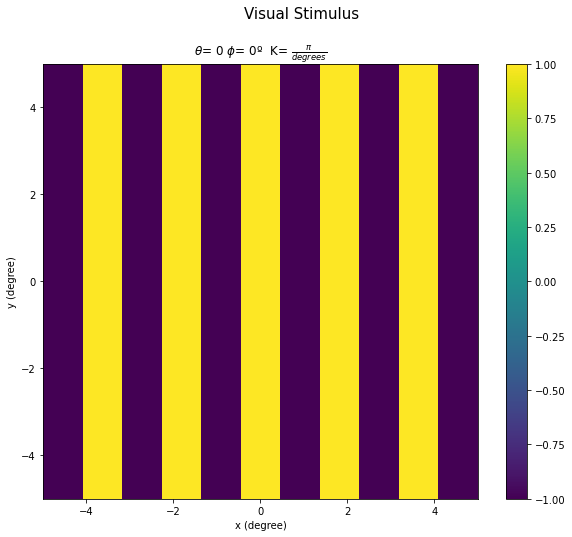

In [4]:
def sin_grating(x,y,phi,theta, A, K):
    return A * np.cos(K* x * np.cos(theta) + K* y * np.sin(theta) - phi)
    
fig = plt.figure(figsize=(10, 8))
s = sin_grating(x,y, 0, 0, 1, np.pi*1)
plt.imshow(s, extent=[-5,5,-5,5])
plt.xlabel("x (degree)")
plt.ylabel("y (degree)")
plt.colorbar()
plt.title(r'$\theta$= 0 '+"$\phi$= 0"+ "º\t"+ "K= " + r'$\frac{\pi}{degrees}$')
plt.suptitle("Visual Stimulus\n", fontsize= 15)
plt.show()
'''
##################################################################################
see above, discretization step way too large!
but nicely formatted figure!
##################################################################################
''';

#### c) 
Vary the orientation $Θ$ and the spatial frequency $K$ and plot the resulting gratings

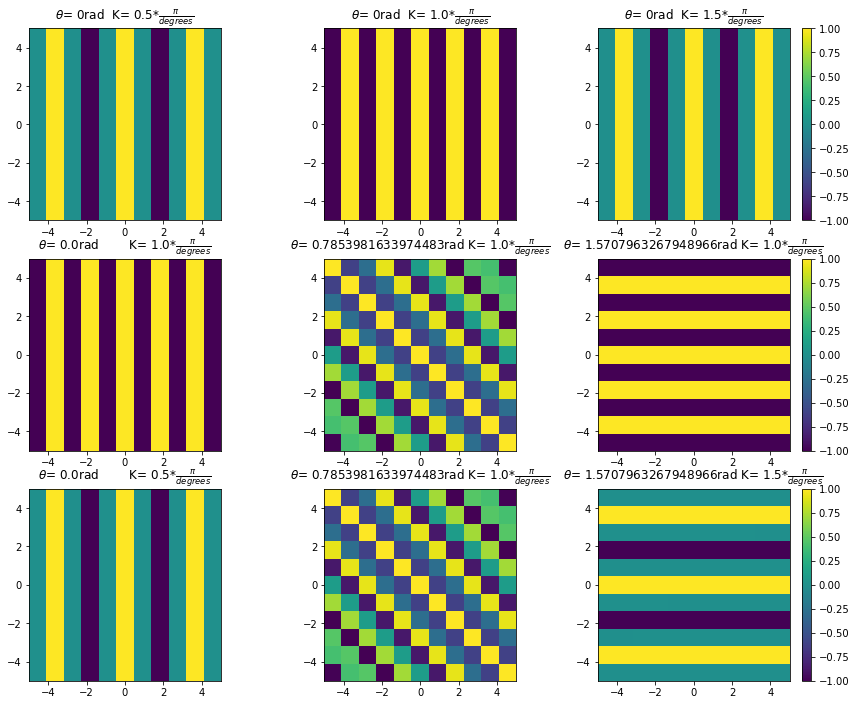

In [6]:
theta = np.linspace(0, np.pi/2, 3)
K = np.linspace(1,3,3)
fig2 = plt.figure(figsize=(15, 12))
#first row  varying K
for i in range(len(theta)):
    plt.subplot(3,3, i+1)
    sk = sin_grating(x,y, 0, 0,  1, np.pi*K[i]/2)
    plt.title(r'$\theta$= '+ str(0)+"rad\t"+ "K= " +str(K[i]/2)+r'*$\frac{\pi}{degrees}$')
    plt.imshow(sk, extent=[-5,5,-5,5], origin ='lower')
plt.colorbar()    
#second row of the subplot varying theta  
for i in range(len(theta)):
    plt.subplot(3,3, i+4)
    st = sin_grating(x,y, 0,theta[i],  1, np.pi*K[1]/2)
    plt.title(r'$\theta$= '+ str(theta[i])+"rad\t"+ "K= " +str(K[1]/2)+r'*$\frac{\pi}{degrees}$')
    plt.imshow(st, extent=[-5,5,-5,5], origin ='lower')
plt.colorbar()    
#third row of the subplot  varying both
for i in range(len(theta)):
    plt.subplot(3,3, i+7)
    sb = sin_grating(x,y, 0,theta[i],  1, np.pi*K[i]/2)
    plt.title(r'$\theta$= '+ str(theta[i])+"rad\t"+ "K= " +str(K[i]/2)+r'*$\frac{\pi}{degrees}$')
    plt.imshow(sb, extent=[-5,5,-5,5], origin ='lower')
plt.colorbar()
fig.suptitle(r'Varying $\theta$ and $K$')
plt.show()


'''
##################################################################################
note: all your plots are upside down! If you want the [0,0] of your array in the bottom left, 
you must specify in imshow: origin='lower'
##################################################################################
''';


First of all (row 1), we varied the value of $K$ from 0.5 *$\frac{\pi}{degrees}$ to 1.5 *$\frac{\pi}{degrees}$ while keeping $Θ$ at 0 rad. As we can see, $K$ corresponds to the spatial frequency, and increasing it leads to a higher number of positive regions in the visual stimulus space. 
In the second row, we changed $Θ$ from 0 to $\frac{\pi}{2}$ while keeping $K$ constant at 1 *$\frac{\pi}{degrees}$. It is also possible to understand that $Θ$ corresponds to the orientation, "tilting" the positive regions in a certain angle. 

Finally, we plotted some combinations of changing both $K$ and $Θ$, observing both described effects simultaneously.

In [ ]:
'''
##################################################################################
"As we can see, KK corresponds to the spatial frequency.."
correct, but this can definitely not be seen in these plots! ^^
##################################################################################
''';

These observations can be seen more clearly if we redefine x and y as linspaces, rather than just a few discrete points:

In [ ]:
'''
##################################################################################
Aha, nice that you noticed it yourself! 
In this case no need to submit the "outdated" solution above for too large discretization step, simply update ;)

A note on the phrasing:
"if we redefine x and y as linspaces"
not clear what you mean here.. whether x and y are lists or created via np.linspace says nothing about 
their sampling rate, in both cases this is chosen by you..
##################################################################################
''';

In [8]:
def get_phr(c0, varC):
    coordinates = []
    for i in np.linspace(0, (2*c0)/varC +1, 50):
        coordinates.append(-c0 + i*varC)
    return np.array(coordinates)

phr_x3lin = get_phr(5, 1)
phr_y3lin = get_phr(5, 1)

xlin,ylin = np.meshgrid(phr_x3lin,phr_y3lin)

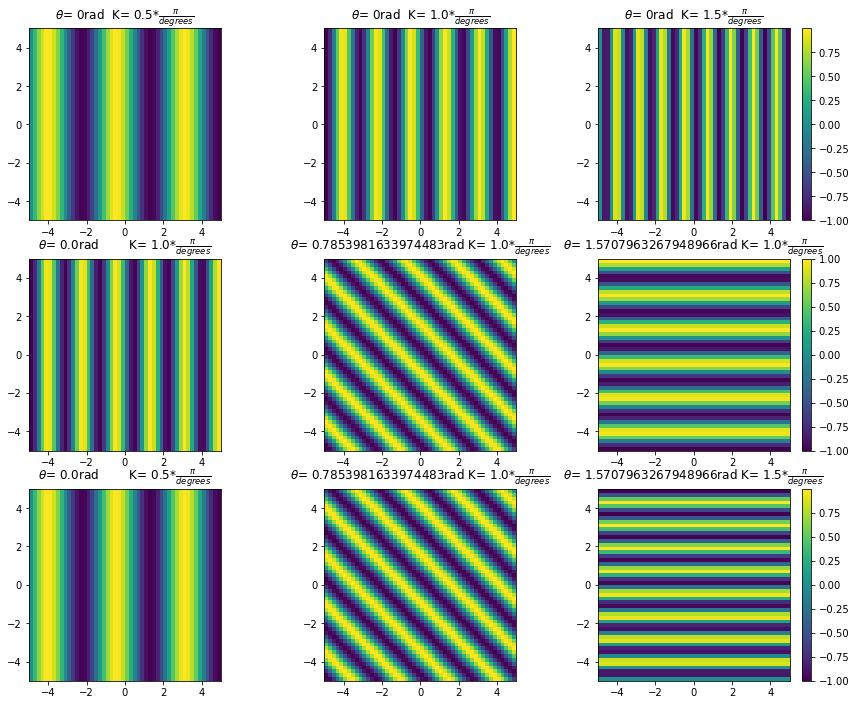

In [12]:
theta = np.linspace(0, np.pi/2, 3)
K = np.linspace(1,3,3)
fig2 = plt.figure(figsize=(15, 12))
#first row  varying K
for i in range(len(theta)):
    plt.subplot(3,3, i+1)
    sk = sin_grating(xlin,ylin, 0, 0,  1, np.pi*K[i]/2)
    plt.title(r'$\theta$= '+ str(0)+"rad\t"+ "K= " +str(K[i]/2)+r'*$\frac{\pi}{degrees}$')
    plt.imshow(sk, extent=[-5,5,-5,5], origin ='lower')
plt.colorbar()    
#second row of the subplot varying theta  
for i in range(len(theta)):
    plt.subplot(3,3, i+4)
    st = sin_grating(xlin,ylin, 0,theta[i],  1, np.pi*K[1]/2)
    plt.title(r'$\theta$= '+ str(theta[i])+"rad\t"+ "K= " +str(K[1]/2)+r'*$\frac{\pi}{degrees}$')
    plt.imshow(st, extent=[-5,5,-5,5], origin ='lower')
plt.colorbar()    
#third row of the subplot  varying both
for i in range(len(theta)):
    plt.subplot(3,3, i+7)
    sb = sin_grating(xlin,ylin, 0,theta[i],  1, np.pi*K[i]/2)
    plt.title(r'$\theta$= '+ str(theta[i])+"rad\t"+ "K= " +str(K[i]/2)+r'*$\frac{\pi}{degrees}$')
    plt.imshow(sb, extent=[-5,5,-5,5], origin ='lower')
plt.colorbar()
fig.suptitle(r'Varying $\theta$ and $K$')
plt.show()

In [ ]:
'''
##################################################################################
much better! only remaining problem:
you must specify in imshow: origin='lower'
##################################################################################
''';

## 2) A model of receptive fields
A receptive field (RF) describes the “sensitivity” of a neuron to its inputs, depending on their position in the visual field. A convenient mathematical approximation of a receptive field is provided by the Gabor function:
$$
D_s(x,y)=\frac{1}{2\pi\sigma_x\sigma_y}exp(-\frac{x^2}{2\sigma_x^2}-\frac{y^2}{2\sigma_y})cos(kx-\phi)
$$
where $k$ is the preferred spatial frequency, $\phi$ is the preferred spatial phase and $σ_x$, $σ_y$ define the receptive field sizes.

#### a)
Implement a Gabor function as a model of a receptive field with preferred spatial frequency
 $k=\pi\frac{1}{degrees}$ ,preferred spatial phase $\phi$=0 and receptive field size $σ_x$ =2º,$σ_y$ =1º. Plot this Gabor receptive field.

In [26]:
def gabor_function(x,y, sigmax, sigmay, phi, k):
    return (1/2*np.pi*sigmax*sigmay)*np.exp((-((x**2)/(2*sigmax**2))-(y**2/(2*sigmay**2))))*np.cos(k*x-phi)

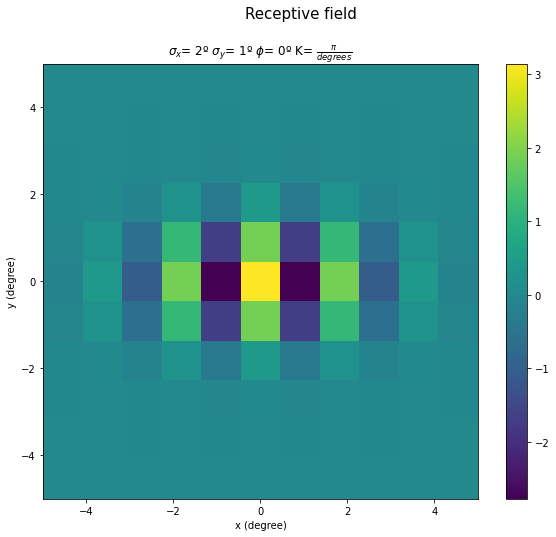

In [27]:
fig3 = plt.figure(figsize=(10, 8))
g = gabor_function(x,y, 2, 1, 0, np.pi*1)
plt.imshow(g, extent=[-5,5,-5,5], cmap='viridis')
plt.xlabel("x (degree)")
plt.ylabel("y (degree)")
plt.colorbar()
plt.title(r'$\sigma_x$= 2º $\sigma_y$= 1º $\phi$= 0º K= $\frac{\pi}{degrees}$')
plt.suptitle("Receptive field\n", fontsize= 15)
plt.show()

In [ ]:
'''
##################################################################################
as before: quite obviously resolution is too coarse! why did you go back to the old x,y?
##################################################################################
''';

#### b) 

What are the optimal stimuli for a neuron with such a RF? Where can you find a neuron with
such a RF? Does this RF characterize a simple cell or a complex cell and why?

Optimal stimuli for a neuron with such a receptive field are ones that have light on the positive parts of the Gabor function and no light on the negative parts, that is, stimuli that align as much as possible with the Gabor function shown in a).

This receptive field characterizes a simple cell, because it "responds only to particular orientations and single points of light withing the excitatory region" and "can be constructed as a combination of the responses of center-surround cells in the lateral geniculate nucleus" Mathematically, this means that the stimuli from the different locations within the RF sum linearly. Unlike complex cells, it does not "require stimulation across their entire length", having stimuli from the different locations within the RF interacting nonlinearly. Such a neuron can be found in the primary visual cortex (V1) (Jamie Ward- THe Student's Guide to Cognitive Neuroscience, Psychology Press, 2015). 

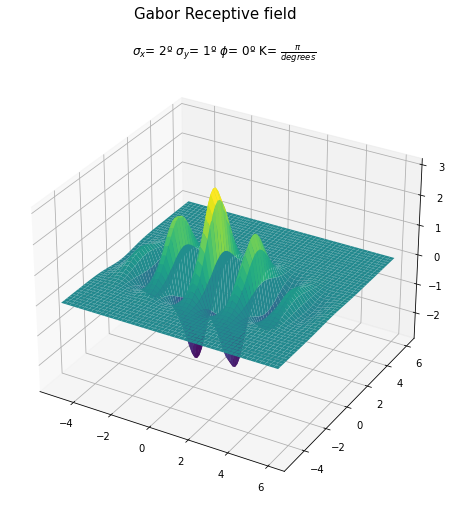

In [28]:
def get_phr(c0, varC):
    coordinates = []
    for i in np.linspace(0, (2*c0)/varC +1, 50):
        coordinates.append(-c0 + i*varC)
    return np.array(coordinates)

phr_x3d = get_phr(5, 1)
phr_y3d = get_phr(5, 1)

x3d,y3d = np.meshgrid(phr_x3d,phr_y3d)

fig4 = plt.figure(figsize=(10, 8))

g3d = gabor_function(x3d,y3d, 2, 1, 0, np.pi*1)
ax = plt.axes(projection='3d')
ax.plot_surface(x3d,y3d,g3d,cmap='viridis', edgecolor='none')
plt.title(r'$\sigma_x$= 2º $\sigma_y$= 1º $\phi$= 0º K= $\frac{\pi}{degrees}$')
plt.suptitle("Gabor Receptive field\n", fontsize= 15)
plt.show()
'''
##################################################################################
nice! add axis labels
##################################################################################
''';

#### c)

The linear response rs of a neuron with receptive field Ds to a visual stimulus s, is given by


$$
r_{s}= \int_ s(x,y) D_{s}(x,y) dxdy \
$$


Numerically this corresponds to

$$
r_{s}= (s \cdot D_{s}) \Delta x \Delta y = \sum_{i=o}^{\frac{2x_o}{\Delta x}} \sum_{j=o}^{\frac{2y_o}{\Delta y}} s(x,y) D_{s}(x,y) \Delta x \Delta y
$$



Numerically calculate the response of a cell with a Gabor receptive field (parameters as in exercise 2a) to the grating from exercise 1b, and state the resulting number in your report.

Compare it with a response to an uniformly illuminated visual field (s(x; y) = A). Explain the difference.

In [29]:
def linear_response(x, y, sxy, Ds, Varx, Vary):
    return np.trace(sxy@Ds.T)
'''
##################################################################################
nice use of matrix operations! but you forgot the factors *Varx*Vary in the end!
why does this fct need inputs x and y??
##################################################################################
''';

In [30]:
rs= linear_response(x,y, s, g, 1, 1)
rs

39.263025228180126

In [31]:
rs2= linear_response(x,y, np.ones((11,11)), g, 1, 1)
'''
##################################################################################
(11,11) are what we call "magic numbers"! 
instead type sxy.shape!
##################################################################################
''';
rs2

-0.14521708228802413

Using the visual stimulus of a) (counterphase grating), we get a much higher response than using a constant stimulus of amplitude A = 1. This makes sense because our visual stimulus of a) is much more aligned with the Receptive field, that is: the regions in the stimulus with +1 correspond to regions with positive values of the Gabor function (and vice-versa). Therefore, the products in most regions are positive, which means that the linear response (the sum of these components) is going to be higher. 

On the other hand, using a uniformly illuminated visual field means that we will also have negative components of the sum of the linear response, which diminish the overall result.


Biologically, it also makes sense that this happens, because these simple cells are composed of many retinal ganglion cells, which can be described as having an ON center and an OFF surround. If there is light on center only, the cells fire rapidly, whereas if there is light on both center and surround the response of the cells is much weaker. 

In [32]:
rs3= linear_response(x,y, g, g, 1, 1)
rs3

62.01447874122655

As a sidenote, the response would be even higher (maximal) if the visual stimulus would be the same as the gabor function, in accordance with 2.b).

## 3)
A tuning curve describes the dependence of the neuronal response on a parameter of the stimulus such as spatial frequency, orientation or phase. Plot the neuronal response $r$ to the grating from the exercise $1b$ as a function of:


In [33]:
rs= linear_response(x,y, s, g, 1, 1)

In [34]:
def linear_responseorientation(x, y, sxy, Ds, Varx, Vary):
    return np.trace(sxy@Ds.T)  
'''
##################################################################################
exact same function as before, no need to redefine!
##################################################################################
''';

In [35]:
#We create the different values to vary our linear response
#Theta
difftheta = np.linspace(-np.pi, np.pi, 100)
rst = []
for i in difftheta:
    rst.append(linear_response(x,y, sin_grating(x,y,0, i, 1, np.pi), g,1,np.pi ))
r_theta = np.array(rst)

#K/k
diffk2 = np.linspace(0.5*np.pi, 2*np.pi, 50)
rsk2 = []
for i in diffk2:
    rsk2.append(linear_response(x,y, sin_grating(x,y,0, 0, 1, i), g, 1, np.pi))
rK_k2 = np.array(rsk2)

#Phi
diffphi=np.linspace(-2*np.pi, np.pi*2,100)
rsphi=[]
for i in diffphi:
    rsphi.append(linear_response(x,y, sin_grating(x,y, i, 0,1, np.pi), g, 1, np.pi))
r_phi= np.array(rsphi)

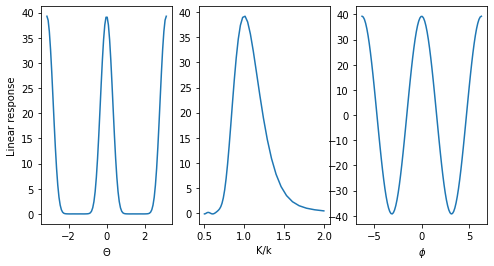

In [36]:
#Plotting the 3 linear responses plots
fig = plt.figure(figsize=(8, 4))
plt.subplot(1,3,1)
plt.plot(difftheta, r_theta) #K = 1
plt.xlabel("$Θ$")
plt.ylabel("Linear response")

plt.subplot(1,3,2)
plt.plot(np.pi/diffk2, rK_k2)
plt.xlabel("K/k")

plt.subplot(1,3,3)
plt.plot(diffphi, r_phi)
plt.xlabel(r"$\phi$")

plt.show()

In [ ]:
'''
##################################################################################
correct in principle, except for follow-up errors from
-- low resolution in x,y
-- missing scaling by dxdy in response
##################################################################################
''';
### Mehsgrid starts making the array from bottom left so we have to specify that's the origin for imshow

The gabor function applied to these visual stimuli (counterphase grating) is maximal for $Θ$ = 0, $K$ = $k$ and $\Phi$ = $\phi$ = 0. Therefore, these are the preferred parameters of the stimuli. In other words, and as states previously, the response is maximal if the receptive field and the visual stimulus are aligned.
Note that there exists a periodicity with respect to $\pi$ or one of its multiples ($\pi$ for $Θ$, 2 * $\pi$ for $\Phi$).